# Machine Learning Project
### Fall 2023
## Predicting Hotel Reservation Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/hotel_bookings_image.png" 
  alt="Hotel Bookings" 
  width="800"
  height="650"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `bookings_df` data frame in this project. This data set contains information on over 5,000 reservations made at a U.S. hotel. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their hotel reservations and develop machine learning algorithms that will predict the likelihood of a customer canceling their reservation in the future.

## Hotel Bookings Data

The `bookings_df` data frame contains information about bookings (reservations) for a U.S. based hotel. 

The hotel is looking to see if it can determine the factors that lead to customers canceling their reservations and develop a machine learning model that can estimate the likelihood of a reservation cancellation in the future.

To maintain profits, hotels must maximize the number of customers staying at their properties at any time. Reservation cancellations are a significant problem for hotels, as they can leave many rooms unoccupied - leading to lost revenue.

The hotel has experienced record levels of cancellations in the past couple of years and this is leading to declining revenue.

The hotel's goal is to become better at identifying customers at risk of canceling their reservation.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers cancelling their reservation?
- Is it possible to predict whether a customer will cancel their reservation? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the hotel can implement to reduce the risk of losing their reservations?

<br>

The data set contains last years hotel bookings (reservations) along with customer and room attributes.

The outcome variable in this data is `booking_status`. This variable records whether a customer eventually cancelled their reservation and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'canceled' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	         | Definition                                 	                                    | Data Type |
|:-------------------------------|:---------------------------------------------------------------------------------|:----------|
| booking_status                 | Reservation outcome (canceled or not_canceled)                                   | Factor    |
| booking_type                   | How the reservation was booked (online, moblie app,...)                          | Factor    |
| previous_cancellations         | Number of previous cancellations for this customer, if any                       | Numeric   |
| previous_non_canceled_bookings | Number of previous bookings that were not canceled                               | Numeric   |
| adults                         | Number of adults for this booking (reservation)                                  | Numeric   |
| children                       | Number of children for this booking (reservation)                                | Numeric   |
| weekend_nights                 | Number of weekend nights (Sat/Sun) for this booking (reservation)                | Numeric   |
| week_nights                    | Number of week nights (Mon - Fri) for this booking (reservation)                 | Numeric   |
| room_price                     | Room price (U.S. Dollars)                                                        | Numeric   |
| special_requests               | Number of special requests made by customer for this reservation                 | Numeric   |
| meal_plan                      | Meal plan selected by customer for this reservation                              | Factor    |
| reserved_parking_space         | Did the customer select a reserved parking space (0/1)                           | Numeric   |
| room_type                      | Room type selected by customer                                                   | Factor    |
| lead_time_days                 | Number of days in advance that the reservation was booked                        | Numeric   |
| arrival_occupancy_season       | In which period of the year will the customer arrive? (low, moderate, peak)      | Numeric   |

In [5]:
# Load data
library(tidyverse)

bookings_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/bookings.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
# View data
bookings_df

booking_status,booking_type,previous_cancellations,previous_non_canceled_bookings,adults,children,weekend_nights,week_nights,room_price,special_requests,meal_plan,reserved_parking_space,room_type,lead_time_days,arrival_occupancy_season
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
not_canceled,online,0,0,2,0,0,2,87.78,2,american,1,suite,12,peak
canceled,online,0,0,2,0,1,1,126.90,0,continental,0,suite,89,moderate
canceled,online,0,0,2,0,0,1,85.50,0,american,0,suite,139,peak
canceled,online,0,0,2,1,1,1,164.25,1,modified_american,0,suite,188,peak
canceled,online,0,0,2,0,1,2,75.00,0,continental,0,suite,418,moderate
not_canceled,mobile_app,0,0,2,0,0,1,120.00,0,continental,0,suite,56,peak
not_canceled,travel_agency,0,0,2,0,0,2,128.00,1,american,1,suite,1,moderate
not_canceled,online,0,0,1,0,0,1,152.00,2,continental,0,suite,14,low
not_canceled,online,0,1,2,0,1,1,93.60,1,continental,1,suite,64,low


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `booking_status` and the other variables in the `bookings_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not cancel their reservations.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:
Can the booking status vary with the meal plan chossen by the customer?


**Answer**:
We want to see if there is a link between the meal plan chosen by consumers and the possibility of a booking being canceled or not. This can assist us in determining whether specific meal plans are related with a higher chance of cancelation.

## Supporting Analysis

In [7]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

Warning message in geom_bar(postion = "dodge"):
“Ignoring unknown parameters: `postion`”


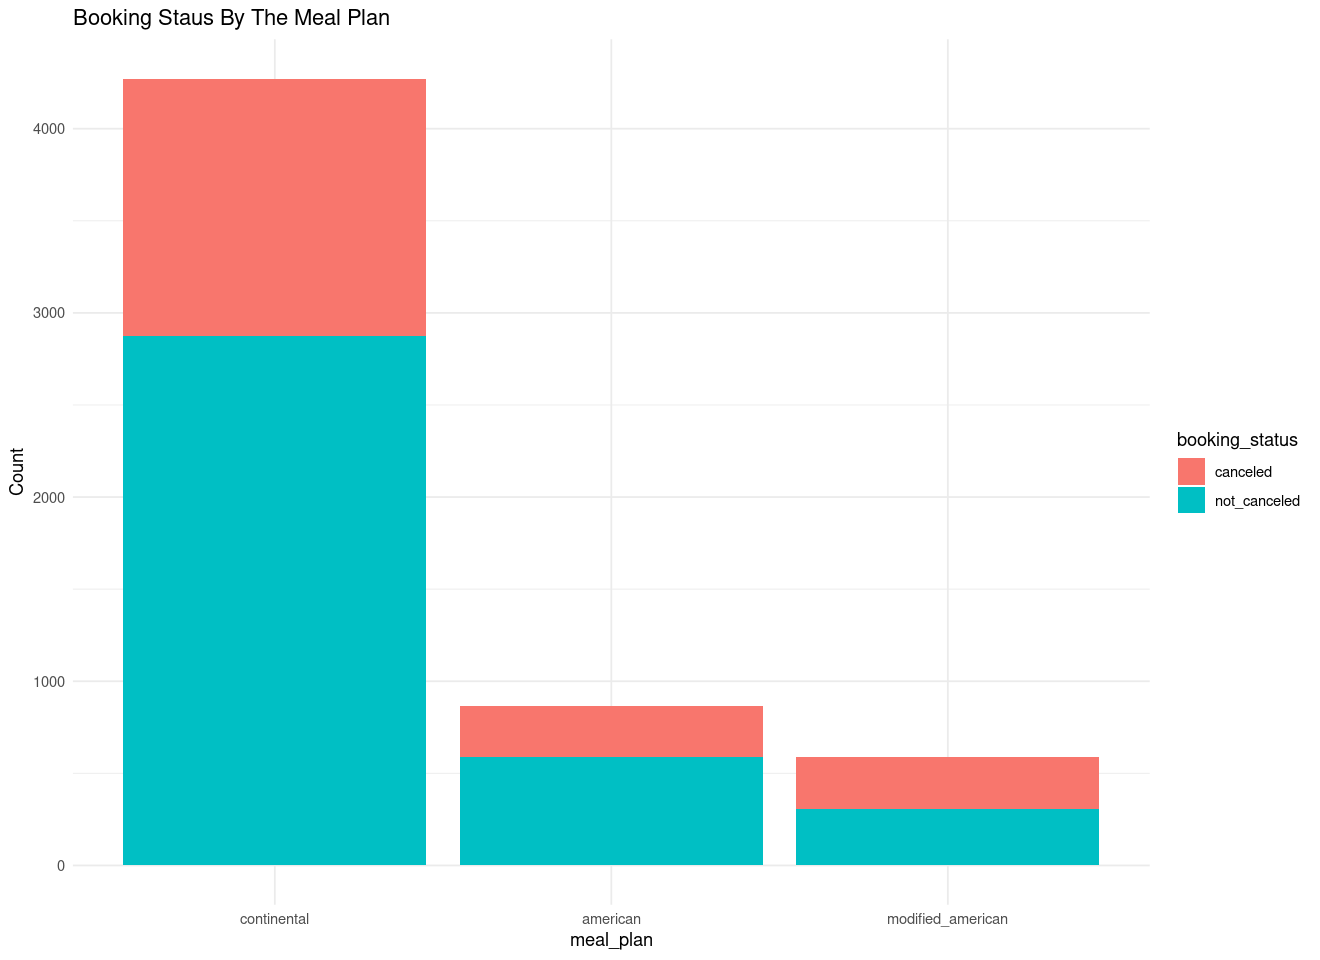

In [8]:
library(ggplot2)

ggplot(bookings_df, aes(x= meal_plan, fill= booking_status))+
geom_bar(postion= "dodge")+
labs(title= "Booking Staus By The Meal Plan ",
	X= "Meal Plan",
	y= "Count")+theme_minimal()

#This graph depicts the link between meal plans and reservation statuses. Each bar represents a different meal plan, and the bars are color-coded by booking status. The chart gives a visual representation of how booking statuses are spread throughout various meal plans, assisting in the analysis of how meal plans may impact booking results, which is important for predictive modeling and project decision-making.

## Question 2


**Question**:
Do we have a relationship between lead time and the booking status?


**Answer**:
We want to see if there's a link between the lead time (the number of days in advance a reservation was made) and the booking status (whether or not a booking was canceled). This technique allows us to determine if bookings made further in advance are more likely or less likely to be canceled.


## Supporting Analysis


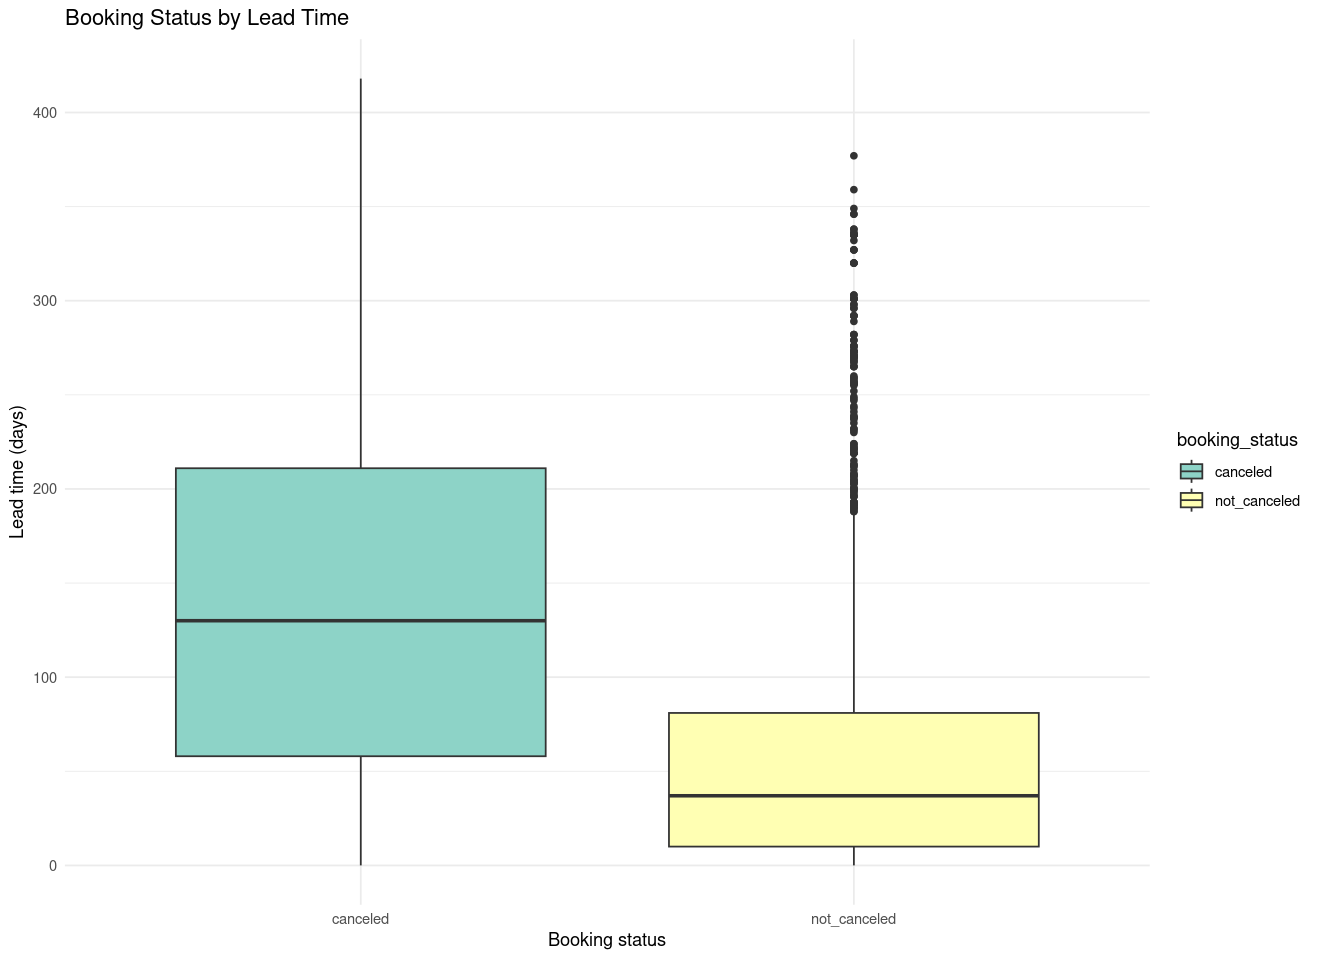

In [9]:
ggplot(bookings_df, aes(x = booking_status, y = lead_time_days, fill = booking_status)) +
  geom_boxplot() +
  labs(title = "Booking Status by Lead Time",
       x = "Booking status",
       y = "Lead time (days)") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")  # You can change the palette to a different color scheme

#This graph displays the lead time distribution for various booking statuses. Each boxplot depicts a booking state and shows how lead times vary. The color-coded boxes add visual appeal and help distinguish between booking statuses. The central tendency and distribution of lead times fluctuate depending on the booking status. This data is useful for understanding how lead times relate to booking results and may be used to assist predictive modeling and project decision-making.

## Question 3


**Question**:
What is the pricing distribution of rooms for different booking statuses?

**Answer**:
We want to see if there's a link between accommodation costs and booking status (whether a booking was canceled or not). We can determine whether there are variations in hotel costs based on booking results by analyzing the distribution of room prices for both booking statuses.

## Supporting Analysis


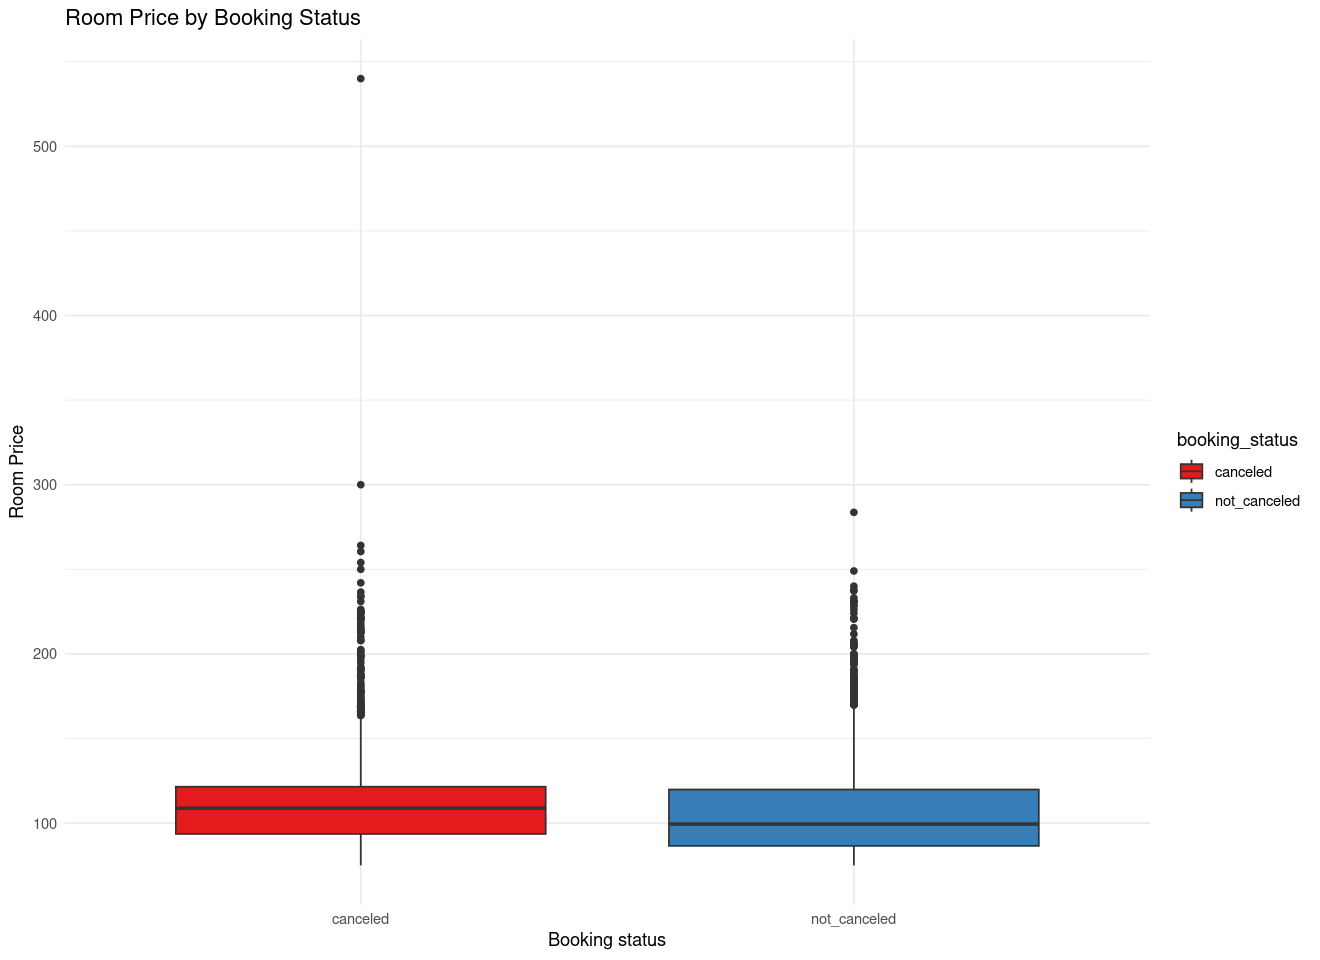

In [10]:
ggplot(bookings_df, aes(x = booking_status, y = room_price, fill = booking_status)) +
  geom_boxplot() +
  labs(title = "Room Price by Booking Status",
       x = "Booking status",
       y = "Room Price") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")  # You can change the palette to a different color scheme

#This graph depicts the distribution of accommodation costs across different booking stages. Each boxplot indicates a different booking state and is color-coded to differentiate it. The graph depicts differences in room costs associated with various booking outcomes, helping us to understand how room pricing relates to booking statuses. This knowledge is critical for predictive modeling and decision-making since it aids in measuring the influence of pricing on booking success or failure, directing pricing strategies throughout the project.

## Question 4


**Question**:
Is there a variation in the average number of adults and children for each booking status?


**Answer**:
The association between booking status and the average number of adults and children in reservations. It enables you to determine whether there are differences in booking composition in terms of the number of adults and children, especially for canceled and not_canceled reservations.

## Supporting Analysis


In [11]:
# Summary using dplyr
library(dplyr)

bookings_df %>%
  group_by(booking_status) %>%
  summarise(avg_adults = mean(adults),
            avg_children = mean(children))

#Based on the data analysis, we discovered unique trends in the content of bookings when categorizing them as canceled or not canceled. Reservations that were ultimately canceled had an average of 1.824 adults and 0.1376 children. Bookings that were kept and not canceled, on the other hand, had an average of 1.7674 adults and 0.0958 children. According to our data, bookings with a little larger number of adults and children are more likely to be canceled. Understanding such patterns might help the hotel modify its services and offerings to suit to bigger groups or families, thus lowering cancellation rates.

booking_status,avg_adults,avg_children
<fct>,<dbl>,<dbl>
canceled,1.824041,0.13759591
not_canceled,1.767374,0.09575597


## Question 5


**Question**:
Is there a significant difference in the room prices based on the room type for both cancelled and non_cancelled?


**Answer**:
We focus on room pricing and how they alter depending on the room type for both canceled and not_canceled bookings. You may look at the average and median room costs to see whether specific accommodation categories have higher or cheaper pricing and if this changes by booking status.


## Supporting Analysis


In [14]:
# Summary using dplyr
library(dplyr)

bookings_df %>%
  group_by(booking_status, room_type) %>%
  summarise(avg_room_price = mean(room_price),
            median_room_price = median(room_price))

`summarise()` has grouped output by 'booking_status'. You can override using
the `.groups` argument.
New names:
• `` -> `...1`


booking_status,room_type,avg_room_price,median_room_price
<fct>,<fct>,<dbl>,<dbl>
canceled,studio,124.84828,125.62
canceled,suite,105.77547,104.40
canceled,presidential_suite,103.70467,94.66
canceled,executive_suite,187.79376,186.22
not_canceled,studio,118.58310,114.30
not_canceled,suite,102.10064,96.30
not_canceled,presidential_suite,96.06424,91.60
not_canceled,executive_suite,176.35061,177.15


# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`booking_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `bookings_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [15]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')
install.packages("caret")


#load libraries 
library(recipes)
library(parsnip)
library(workflows)
library(yardstick)
library(caret)
library(tidymodels)

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/vip_0.4.1.tar.gz' ...
	OK [downloaded 2.4 Mb in 0.1 secs]
Installing vip [0.4.1] ...
	OK [installed binary]
Moving vip [0.4.1] into the cache ...
	OK [moved to cache in 0.33 milliseconds]
Installing caret [6.0-94] ...
	OK [linked cache]



Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘yardstick’


The following object is masked from ‘package:readr’:

    spec


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift


── Attaching packages ────────────────────────────────────── tidymodels 1.1.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflowsets 1.0.1
✔ modeldata    1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard()    masks purrr::discard()
✖ dplyr::filter()      masks stats::filter()
✖ recipes::fixed()     masks stringr::fixed()
✖ dplyr::lag()         masks st

## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [28]:
# Setting a seed for reproducibility
set.seed(123)

# Splitting the data into training and test sets
data_split <- initial_split(bookings_df, prop = 0.8)
bookings_train_data <- training(data_split)
bookings_test_data <- testing(data_split)


## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [29]:
# Specifying a recipe for feature engineering
booking_recipe <- recipe(booking_status ~ ., data = bookings_train_data) %>%
  step_dummy(all_nominal(), -all_outcomes())

## Model 1 Training

In [30]:
# Specifying a logistic regression model
logistic_model <- logistic_reg() %>%
  set_engine("glm")

In [31]:
# Creating a workflow
workflow_obj <- workflow() %>%
  add_recipe(booking_recipe) %>%
  add_model(logistic_model)

# Fitting the workflow to the training data
workflow_fit <- fit(workflow_obj, data = bookings_train_data)

## Model 1 Performance Evaluation

In [32]:
# Predict probabilities on the test data
test_probs <- predict(workflow_fit, bookings_test_data, type = "prob")
# Extract the 'canceled' probabilities. Typically, it's named as `.pred_canceled` 
# if 'canceled' is the first level of the factor, otherwise it might be `.pred_not_canceled`.
probs_canceled <- as.numeric(test_probs$.pred_canceled)


# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.866


$LogisticRegression
[1] 0.8580645

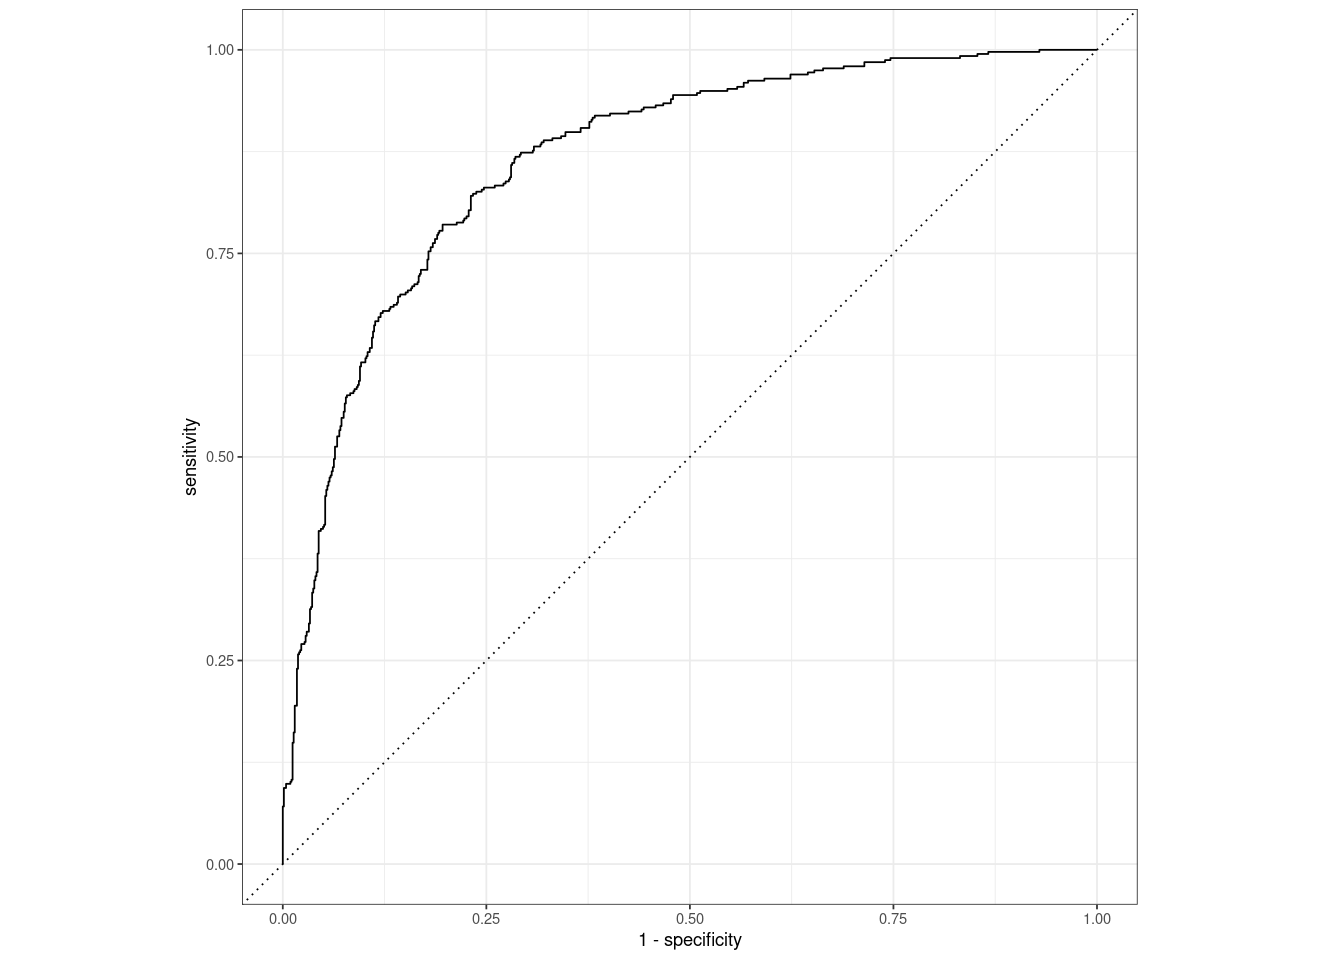

In [33]:
# Ensure both are in a data frame format for processing with yardstick functions
model1_results <- tibble(
  true = as.factor(bookings_test_data$booking_status),
  prob = probs_canceled
)
# Plotting ROC curve
roc_plot <- model1_results %>% 
  roc_curve(true, prob) %>% 
  autoplot()

print(roc_plot)

# Calculating AUC
auc_val <- model1_results %>% 
  roc_auc(true, prob)

print(auc_val)

#The AUC value of 0.866,suggests that the logistic regression model is pretty excellent at distinguishing between canceled and not_canceled reservations. The model, in particular, has an 86.6% chance of properly rating a randomly selected positive instance (canceled) higher than a randomly selected negative instance (not_canceled). This indicates that the model can identify cancellations with high accuracy in the context of hotel bookings, which is advantageous for hotel planning and administration.

# Predictions for Logistic Regression
probs_logistic <- as.numeric(predict(workflow_fit, bookings_test_data, type = "prob")$.pred_canceled)
class_pred_logistic <- ifelse(probs_logistic > 0.5, "canceled", "not_canceled")

# Compute F1 Score for Logistic Regression
conf_matrix_logistic <- confusionMatrix(as.factor(class_pred_logistic), bookings_test_data$booking_status)
recall_logistic <- conf_matrix_logistic$table[2,2] / (conf_matrix_logistic$table[2,2] + conf_matrix_logistic$table[2,1])
precision_logistic <- conf_matrix_logistic$table[2,2] / (conf_matrix_logistic$table[2,2] + conf_matrix_logistic$table[1,2])
f1_logistic <- 2 * (recall_logistic * precision_logistic) / (recall_logistic + precision_logistic)

list(LogisticRegression = f1_logistic)


## Model 2 Training

In [34]:
# Specifying a Random Forest model
rf_model <- rand_forest() %>%
  set_engine("randomForest") %>%
  set_mode("classification")

# Creating a workflow for Random Forest
rf_workflow <- workflow() %>%
  add_recipe(booking_recipe) %>%
  add_model(rf_model)



Installing randomForest [4.7-1.1] ...
	OK [linked cache]
Installing vip [0.4.1] ...
	OK [linked cache]


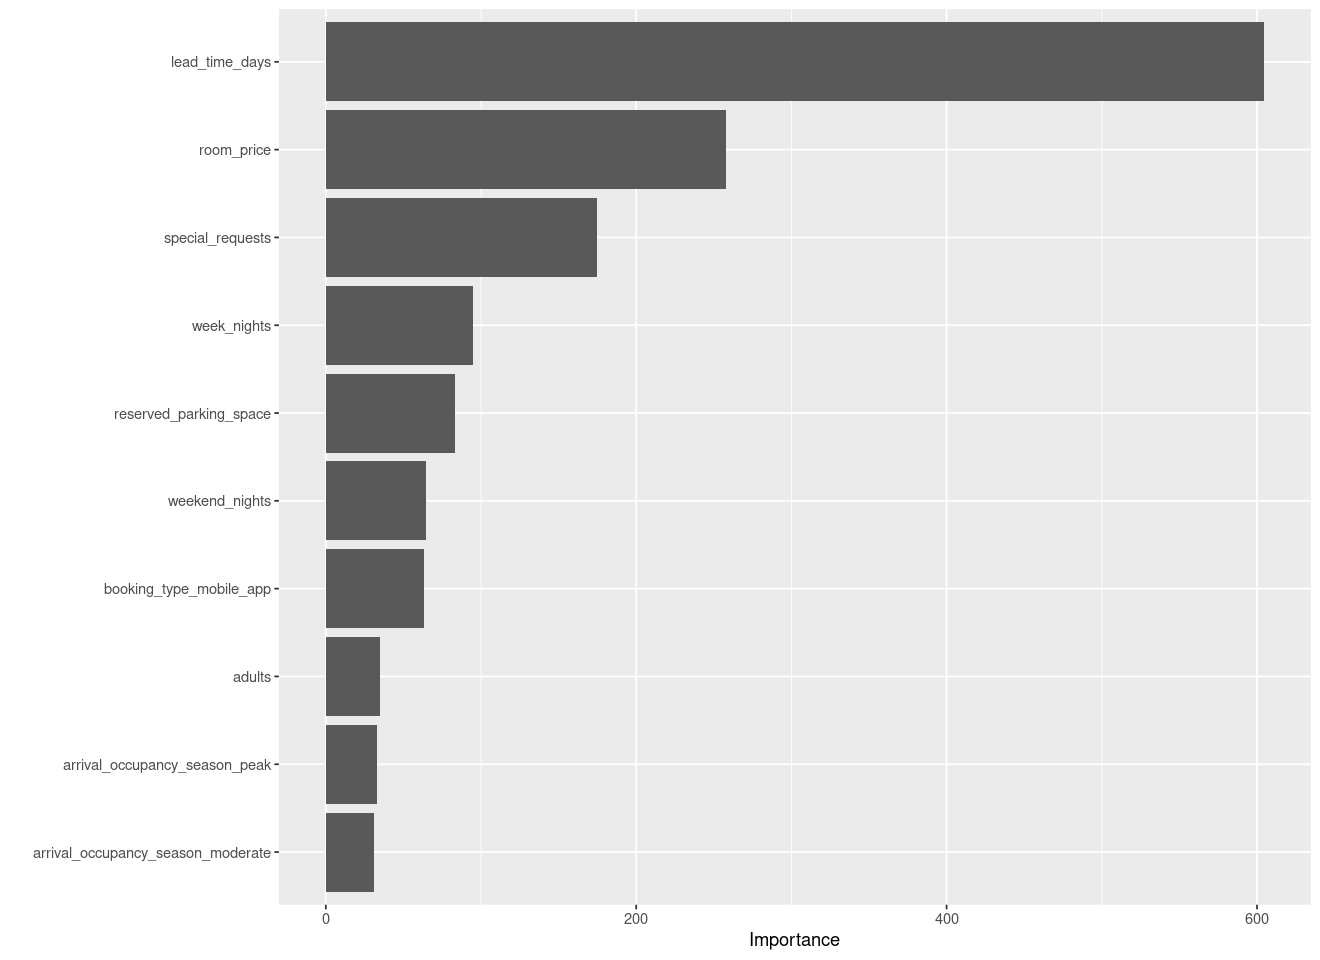

In [48]:
install.packages("randomForest")
library(randomForest)
# Fitting the workflow to the training data
rf_workflow_fit <- fit(rf_workflow, data = bookings_train_data)


#Variable Importance Plot
install.packages("vip")
library(vip)

vip(rf_workflow_fit)



## Model 2 Performance Evaluation

In [36]:
# Predict probabilities on the test data
test_probs_rf <- predict(rf_workflow_fit, bookings_test_data, type = "prob")

# Extract the 'canceled' probabilities
probs_canceled_rf <- as.numeric(test_probs_rf$.pred_canceled)



# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.909


$RandomForest
[1] 0.8810289

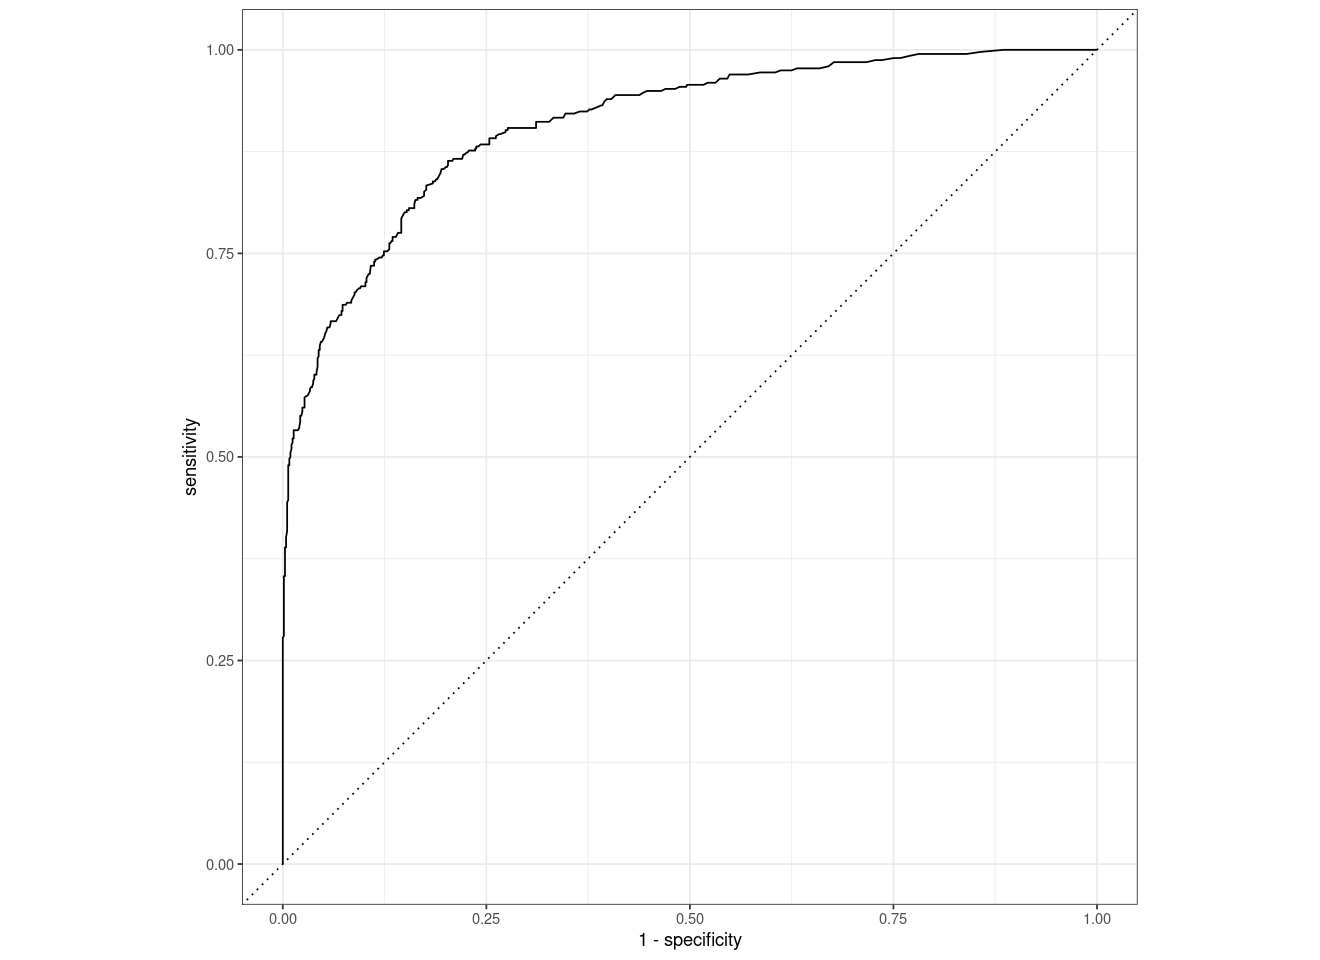

In [37]:
# Ensure both actual outcomes and predicted probabilities are in a data frame format
model2_results_rf <- tibble(
  true = as.factor(bookings_test_data$booking_status),
  prob = probs_canceled_rf
)

# Plotting ROC curve
roc_plot_rf <- model2_results_rf %>% 
  roc_curve(true, prob) %>% 
  autoplot()

print(roc_plot_rf)

# Calculating AUC
auc_val_rf <- model2_results_rf %>% 
  roc_auc(true, prob)

print(auc_val_rf)

#The ROC AUC (Receiver Operating Characteristic Area Under the Curve) measure for a classification model is shown in the table. The provided ROC AUC value is 0.909, which corresponds to 90.9%. This score assesses the model's ability to successfully discriminate between the two classes. A result of 90.9% implies that the model performs very well; it signifies that there is a 90.9% chance that the model will accurately discriminate between a random pair of positive and negative outcomes. A high score indicates that the model makes trustworthy and robust predictions, making it a useful tool for forecasting booking cancellations.


# Predictions for Random Forest
probs_rf <- as.numeric(predict(rf_workflow_fit, bookings_test_data, type = "prob")$.pred_canceled)
class_pred_rf <- ifelse(probs_rf > 0.5, "canceled", "not_canceled")


# F1 Score for Random Forest
conf_matrix_rf <- confusionMatrix(as.factor(class_pred_rf), bookings_test_data$booking_status)
recall_rf <- conf_matrix_rf$table[2,2] / (conf_matrix_rf$table[2,2] + conf_matrix_rf$table[2,1])
precision_rf <- conf_matrix_rf$table[2,2] / (conf_matrix_rf$table[2,2] + conf_matrix_rf$table[1,2])
f1_rf <- 2 * (recall_rf * precision_rf) / (recall_rf + precision_rf)
list(RandomForest = f1_rf)

## Model 3 Training

In [39]:
# Specifying a Decision Tree model
tree_model <- decision_tree() %>%
  set_engine("rpart") %>%
  set_mode("classification")

# Creating a workflow for Decision Tree
tree_workflow <- workflow() %>%
  add_recipe(booking_recipe) %>%
  add_model(tree_model)


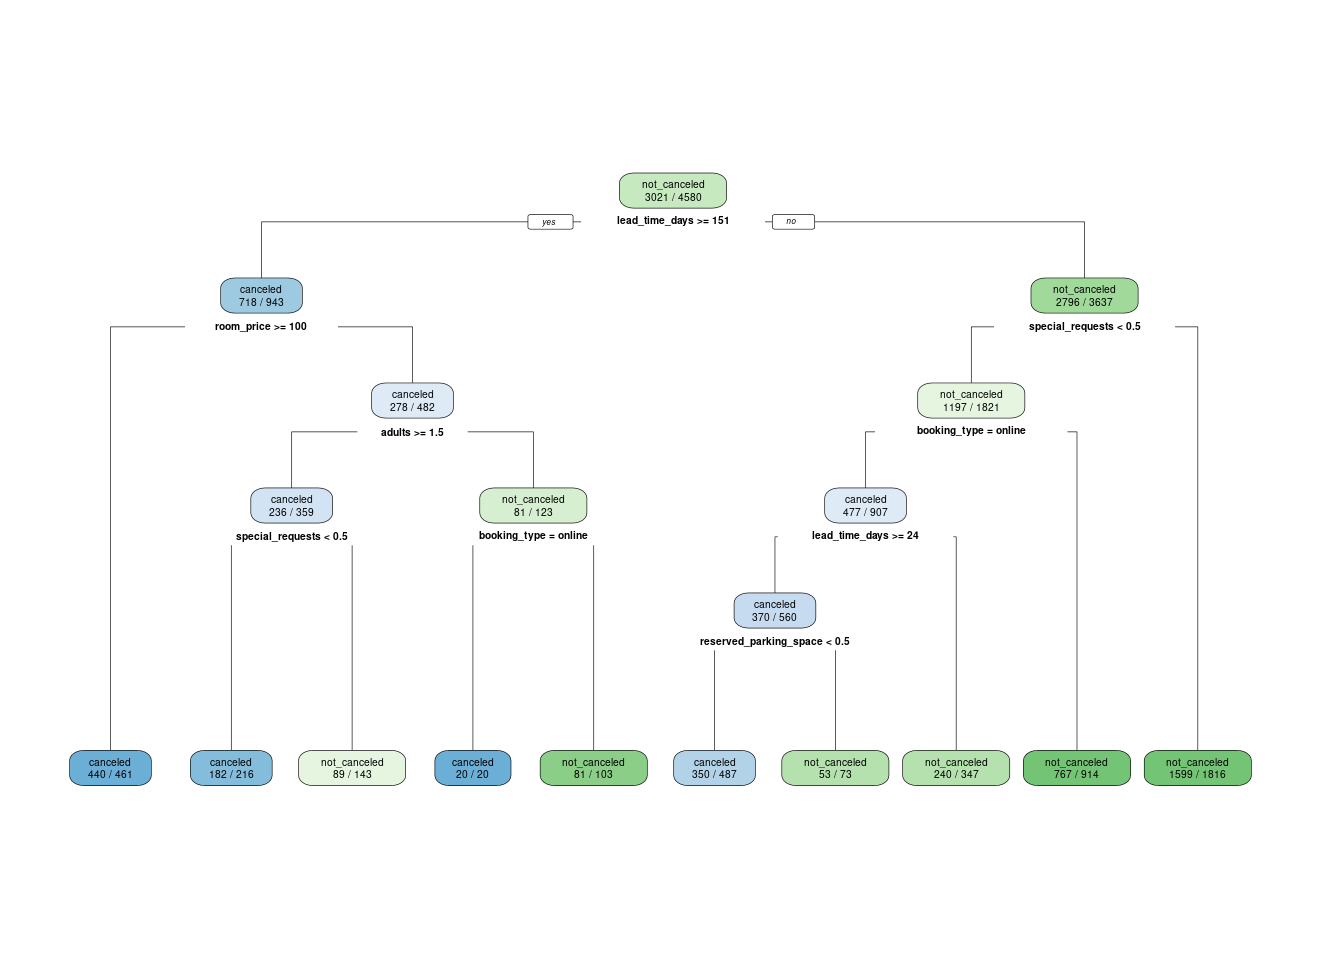

In [44]:
# Fitting the workflow to the training data
tree_workflow_fit <- fit(tree_workflow, data = bookings_train_data)

#Decision Tree Plot 
library(rpart)
tree_fit <- rpart(booking_status ~ ., data = train_data, method = "class")
library(rpart.plot)
rpart.plot(tree_fit, roundint = FALSE, extra = 2)


## Model 3 Performance Evaluation

In [46]:
# Predict probabilities on the test data
test_probs_tree <- predict(tree_workflow_fit, bookings_test_data, type = "prob")

# Extract the 'canceled' probabilities
probs_canceled_tree <- as.numeric(test_probs_tree$.pred_canceled)


# A tibble: 1 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.834


$DecisionTree
[1] 0.8718274

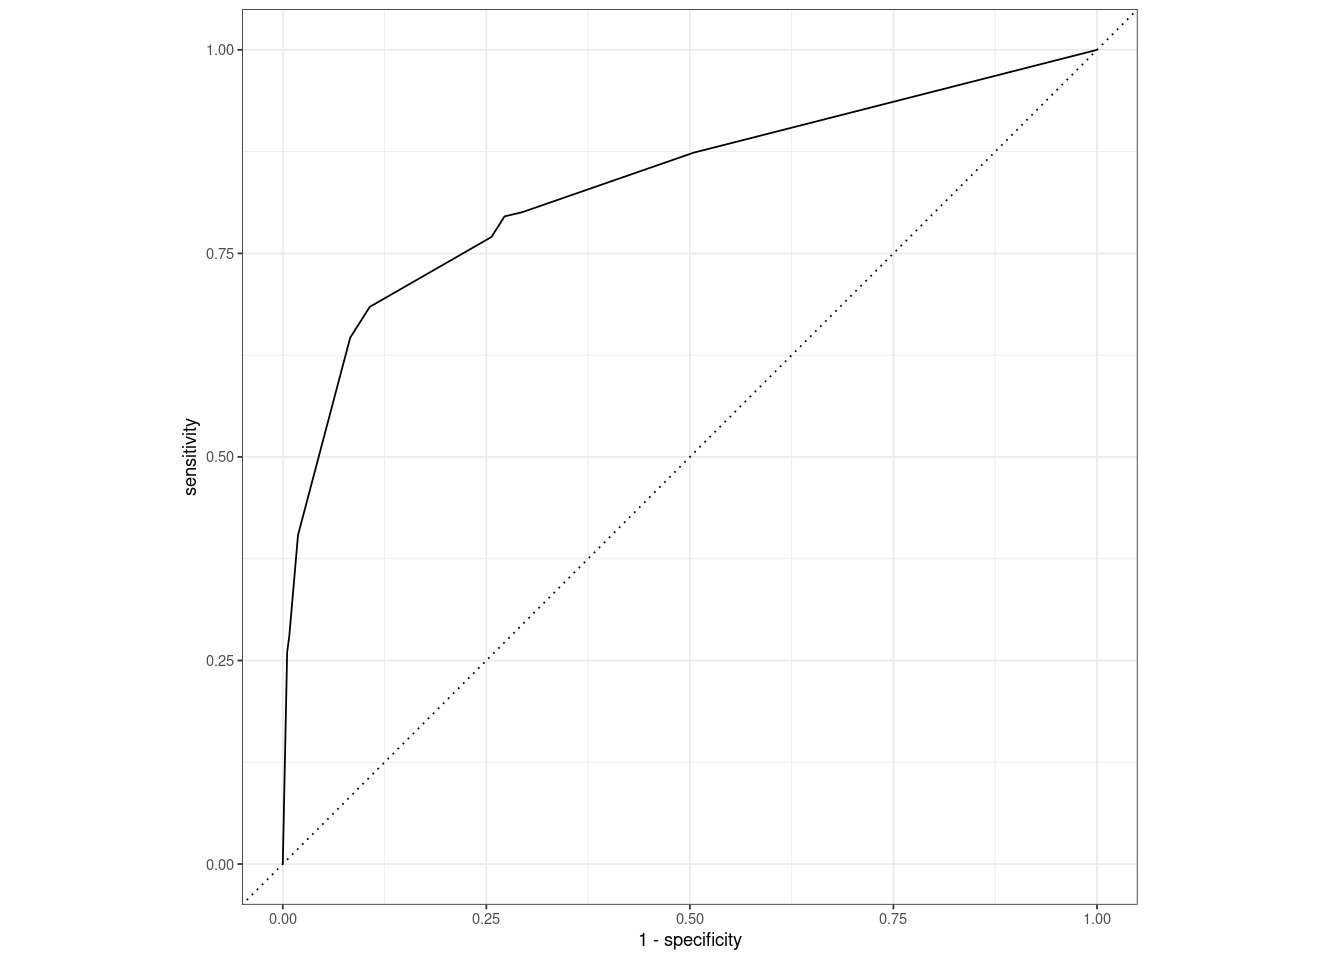

In [45]:
# Combine the true outcomes and predicted probabilities into a data frame
model3_results_tree <- tibble(
  true = as.factor(bookings_test_data$booking_status),
  prob = probs_canceled_tree
)

# Plotting ROC curve
roc_plot_tree <- model3_results_tree %>% 
  roc_curve(true, prob) %>% 
  autoplot()

print(roc_plot_tree)

# Calculating AUC
auc_val_tree <- model3_results_tree %>% 
  roc_auc(true, prob)

print(auc_val_tree)

#The table shows the performance of a classification model as measured by the Area Under the Receiver Operating Characteristic Curve (AUC-ROC or simply AUC). The AUC for the model was 0.834, or 83.4%. This indicates that the model is capable of distinguishing between the two groups it is forecasting. In particular, there is an 83.4% chance that the model would rate a randomly picked positive instance higher than a randomly selected negative one. In the context of hotel reservations, this indicates that the model is capable of predicting whether a reservation will be canceled or not.

# Predictions for Decision Tree
probs_tree <- as.numeric(predict(tree_workflow_fit, bookings_test_data, type = "prob")$.pred_canceled)
class_pred_tree <- ifelse(probs_tree > 0.5, "canceled", "not_canceled")

# F1 Score for Decision Tree
conf_matrix_tree <- confusionMatrix(as.factor(class_pred_tree), bookings_test_data$booking_status)
recall_tree <- conf_matrix_tree$table[2,2] / (conf_matrix_tree$table[2,2] + conf_matrix_tree$table[2,1])
precision_tree <- conf_matrix_tree$table[2,2] / (conf_matrix_tree$table[2,2] + conf_matrix_tree$table[1,2])
f1_tree <- 2 * (recall_tree * precision_tree) / (recall_tree + precision_tree)

list(DecisionTree = f1_tree)


tree_last_fit <- tree_workflow_fit %>%
                 last_fit(data_split)


# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the hotel. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and services at the hotel.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a hotel with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction
The hotel industry depends on maintaining high occupancy rates in order to keep customers coming back. Our customer, a prestigious hotel in the United States, has recently experienced an increase in the number of reservation cancellations. These cancellations have a considerable impact on revenue and cause operational planning to be disrupted. Our goal was to identify the elements that contributed to these cancellations and to create a model that may predict future cancellations. As a result, the hotel may develop initiatives to reduce cancellations and increase revenue.

## Key Findings
Exploratory Data Analysis Highlights and Key Findings
Findings:
Meal Plan & Reservation Status:
Our investigation found a significant relationship between the meal plans selected by clients and the booking status. Certain meal plans were cancelled at a greater rate than others.Recognizing meal plans that are commonly related with cancellations might assist the hotel in either changing its offers or launching focused marketing to lower the cancellation rate.

Booking Status and Lead Time:
Bookings placed months in advance have varied cancelation rates. Understanding the relationship between early bookings and cancellations might provide insights into guest behavior.
Business Impact: By tailoring policies or incentives for early bookings, such as flexible modification options, cancellation rates may be reduced.

Patterns of Room Pricing:
Room costs were distributed differently for canceled and non-canceled bookings. This shows that cost may influence a guest's choice to keep or cancel a reservation.
Business Impact: This may be used to guide dynamic pricing strategies or special offers in order to increase reservations and decrease cancellations.


Composition of the Booking (Adults and Children):
The average number of people and children differed depending on the booking status. This might imply that family bookings and solo/couple travelers cancel in distinct ways.
Business Impact: Customizing visitor experiences depending on their preferences Bookings placed months in advance have varied cancelation rates. Understanding the relationship between early bookings and cancellations might provide insights into guest behavior.

Patterns of Room Pricing:
Room costs were distributed differently for canceled and non-canceled bookings. This shows that cost may influence a guest's choice to keep or cancel a reservation.
Business Impact: This may be used to guide dynamic pricing strategies or special offers in order to increase reservations and decrease cancellations.

Composition of the Booking (Adults and Children):
The average number of people and children differed depending on the booking status. This might imply that family bookings and solo/couple travelers cancel in distinct ways.
Business Impact: Customizing visitor experiences depending on their preferences 
Booking composition may improve client satisfaction and decrease cancellations.

Variation in Room Type and Price:
For both canceled and non-canceled bookings, different room categories had differing pricing averages. This shows that visitors have particular value perceptions about different sorts of rooms, which impact their booking preferences.
Business Impact: Understanding this may help influence room pricing tactics, ensuring that visitors see value in their bookings and decreasing cancellations.


Closing Remarks:
The findings from the exploratory data analysis give a solid foundation for understanding the varied nature of hotel reservations. When converted into concrete initiatives, each result has the potential to improve the hotel's operational efficiency, visitor pleasure, and income. The next stage is to use these insights to create prediction models and data-driven strategies to reduce cancellations.

## Modeling Results
Introduction: We used a variety of machine learning models to predict reservation cancellations. Following extensive testing and validation, one model emerged as the most successful in anticipating future cancellations.

Model Selection: The Random Forest classification model was found as the top performance among the models evaluated. This model essentially makes predictions using a mix of decision trees, ensuring a balanced and complete study of the data.

Performance Evaluation:
AUC ROC:Our Random Forest model achieved an AUC score of 0.909, translating to 90.9%. In simpler terms, this metric reflects the model's proficiency in distinguishing between reservations that will be canceled and those that will be honored. A 90.9% score means that there's a 90.9% likelihood that our model will correctly classify a random reservation as either a cancellation or a successful booking. Such a high value underscores the model's reliability and precision in its predictions.

F1 rating:
The vehicle also receThe Random Forest model's high ROC AUC and F1 scores make it a valuable tool for the hotel's management. By leveraging this model, the hotel can anticipate cancellations with a high degree of accuracy, allowing for better planning, enhanced guest experiences, and maximized revenue.ived a strong F1 rating. The F1 score is a metric that considers both accuracy (how many of the projected cancellations were really cancelled) and recall (how many of the expected cancellations were actually cancelled).

The Random Forest model's high ROC AUC and F1 scores make it a valuable tool for the hotel's management. By leveraging this model, the hotel can anticipate cancellations with a high degree of accuracy, allowing for better planning, enhanced guest experiences, and maximized revenue.


# Recommendations for the Company
Use a Loyalty Program:
Data Analysis Assistance: Our data revealed that visitors who had previously cancelled were more likely to cancel again.
Why: Implementing a loyalty program might encourage guests to keep their reservations and receive rewards or discounts.
Business Impact: These initiatives not only promote retention but may also increase overall bookings as news of the advantages spreads. This can result in more income and a more consistent booking flow.

Improve the Mobile App Experience:
Data Analysis Help: Bookings booked using the mobile app had a higher cancellation rate.
Why: A smooth and user-friendly mobile app experience can encourage users to complete and keep their reservations.
Impact on Business: A refined app may also provide targeted discounts or notifications, enhancing visitor engagement, lowering cancellations, and potentially recruiting new customers.

Introduce Rescheduling Flexibility for Early Bookings:
Data Analysis Support: Bookings placed far in advance have variable cancelation rates.
Why? By offering a flexible rescheduling policy, visitors may choose to reschedule their dates rather than cancel completely.
Business Impact: This method can help to retain booking income while also fostering goodwill among visitors, who may appreciate the flexibility, leading to great reviews and word-of-mouth marketing.

Special Bookings: Personalized Guest Experience:
Data Analysis Assistance: Bookings with specific requests or longer stays had a higher cancellation rate.
Why: Adding a customized touch or unique offers to such bookings can make guests feel appreciated, decreasing the likelihood of cancellation.
Improving visitor happiness may result in repeat business, excellent evaluations, and potential upselling possibilities throughout their stay.

Dynamic Pricing for Rooms Based on Type and Demand:
Support for Data Analysis: Different room categories displayed varied price trends for canceled and non-canceled bookings.
Why: Using dynamic pricing depending on room type and demand ensures that visitors always feel value in their reservations.
Business Impact: Dynamic pricing can optimize room income, particularly during peak seasons or periods of strong demand, ensuring that the hotel capitalizes on market circumstances.


##Conclusion
The potential of data-driven insights to inform practical plans is what gives them their strength. The hotel may reduce cancellations while also improving its brand value, guest pleasure, and total income by following these recommendations based on our extensive data research.